In [1]:
from fastai.vision.all import *
from fastai.metrics import error_rate
import torch


DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
bs = 8

path_img = 'data'

#from google.colab import drive
#drive.mount('/content/drive')

#path_img = 'drive/My Drive/code/pomodoro_tracker/data'

In [2]:
dls = ImageDataLoaders.from_folder(path_img, valid_pct=0.2, bs=bs, item_tfms=Resize(224, method='squish'))

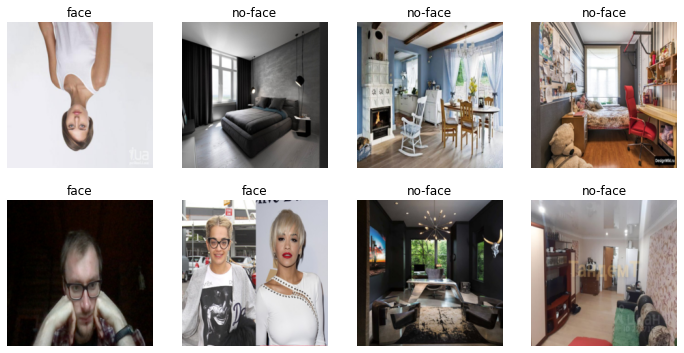

In [3]:
dls.valid.show_batch(max_n=10, nrows=2)

In [1]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

NameError: name 'cnn_learner' is not defined

In [ ]:
learn.fine_tune(3)

In [ ]:
learn.fit_one_cycle(1, 1e-3)

In [ ]:
learn.export()

# Clean Data

In [ ]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

# Interpretation

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=5)

In [ ]:
interp.plot_top_losses(10, nrows=2)

In [ ]:
interp.print_classification_report()

# Load model

In [ ]:
path = Path('data/export.pkl')
learn = load_learner(path)

In [ ]:
import cv2
img_path = 'frames/0-first_frame.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
learn.predict(img)